In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import re

import statsmodels.api as sm  # smoothing
from scipy.signal import find_peaks


In [77]:
def add_axes(ax, minor=True, minor_locator=2):
    axx = ax.secondary_xaxis('top')
    axx.tick_params(
        which='both',
        direction='in',
        labeltop=False,)

    axy = ax.secondary_yaxis('right')
    axy.tick_params(
        which='both',
        direction='in',
        labelright=False,)
    if minor == True:

        ax.yaxis.set_minor_locator(
            matplotlib.ticker.AutoMinorLocator(minor_locator))
        ax.xaxis.set_minor_locator(
            matplotlib.ticker.AutoMinorLocator(minor_locator))
        axx.xaxis.set_minor_locator(
            matplotlib.ticker.AutoMinorLocator(minor_locator))
        axy.yaxis.set_minor_locator(
            matplotlib.ticker.AutoMinorLocator(minor_locator))


def read_file(fname): # read line after regex in file 
    # print('Reading file', fname)
    with open(fname) as f:
        data = []
        regex = r"^ Energy$"
        lines = f.readlines()
        for i, line in enumerate(lines):
            if re.match(regex, line):
                data.append(float(lines[i+1]))
        return np.asarray(data)


def plot_in_dir(Samp):
    plt.style.use('article-1x1.mplstyle')
    plt.rcParams.update(
        {'font.size': 26, 'lines.markersize': 22, 'lines.linewidth': 0, 'lines.marker': '.', })

    fig, ax = plt.subplots(figsize=(20, 12))

    num = np.arange(len(Samp.dftEnergy)) + 1
    Delta = Samp.dftEnergy - Samp.mlipEnergy
    ax.plot(num, Delta)

    # ax.set_xlim(-10, 110)
    # ax.set_ylim(0, None)
    ax.set_ylabel(r'$\Delta$(DFT-MLIP) energy, eV')
    ax.set_xlabel(r'Number of isomer')
    add_axes(ax, minor_locator=2)
    # ax.legend(framealpha=0)

    name = os.path.join(Samp.dir,'%s-DeltaEnergy.png' % Samp.dir)
    plt.savefig(name, facecolor='white', bbox_inches='tight')


In [78]:
class Sample:
    # Constructor
    def __init__(self, plotDir, dft_fname='DFT.energy', mlip_fname='MLIP.energy'):
        self.dir = plotDir
        print('plotDir =', self.dir)
        self.dft_fpath = os.path.join(plotDir,dft_fname)
        self.mlip_fpath = os.path.join(plotDir, mlip_fname)
        print('dft file path =', self.dft_fpath)
        print('mlip file path =', self.mlip_fpath)
        self.dftEnergy = read_file(self.dft_fpath)
        self.mlipEnergy = read_file(self.mlip_fpath)
        print()

    # def cut_xy(self, From, To):
    #     # print(From, To)
    #     ind_cut = np.where((self.x > From) & (self.x < To))
    #     self.x, self.y = self.x[ind_cut], self.y[ind_cut]
    #     self.cutFlag = '-cut'

    # def find_max_cut(self, From=None, To=None, distance=20,
    #                  prominence=None, threshold=None, height=None, x=None, y=None):
    #     x = self.x if x is None else x
    #     y = self.y if y is None else y

    #     if From is None:
    #         From = np.nanmin(x)
    #     if To is None:
    #         To = np.nanmax(x)
    #     # print('From =', From, 'To =', To)
    #     ind_cut = np.where((x > From) & (x < To))
    #     x, y = x[ind_cut], y[ind_cut]

    #     peak, _ = find_peaks(y*1, distance=distance, prominence=prominence,
    #                          threshold=threshold, height=height)
    #     Xmax, Ymax = x[peak], y[peak]
    #     return Xmax, Ymax

    # def find_min_cut(self, From=None, To=None, distance=None, prominence=None, threshold=None, height=None):
    #     x, y = self.x, self.y
    #     if From is None:
    #         From = np.nanmin(x)
    #     if To is None:
    #         To = np.nanmax(x)
    #     # print('From =', From, 'To =', To)
    #     ind_cut = np.where((x > From) & (x < To))
    #     x, y = x[ind_cut], y[ind_cut]

    #     peak, _ = find_peaks(y*-1, distance=distance, prominence=prominence,
    #                          threshold=threshold, height=height)
    #     Xmin, Ymin = x[peak], y[peak]
    #     # print(Xmin, Ymin)
    #     return Xmin, Ymin

    # def smooth(self, frac=0.05):
    #     lowess = sm.nonparametric.lowess(self.x, self.y, frac=frac)
    #     self.x, self.y = lowess[:, 0], lowess[:, 1]
    #     self.smoothFlag = '-smooth'

    # def normalize(self):
    #     y_max = np.nanmax(self.y, axis=0)
    #     self.y = self.y / y_max
    #     self.normFlag = '-norm'


In [79]:
root = os.getcwd()
print("Working directory:",root)
Dirs = [x for x in os.listdir() if os.path.isdir(x)]
print("Directories inside:\n", dir)


Working directory: /home/mik/Projects/Nast/plotEnergy/validation
Directories inside:
 ['3_17', '8_8', '24_1', '15_15', '2_15', '15_1', '3_22', '17_3', '15_2', '1_24', '22_3', '20_5', '12_12', '2_28', '10_10', '19_1', '1_28', '1_19', '28_2', '5_20', '15_5', '1_15', '28_1', '5_15']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotDir = 3_17
dft file path = 3_17/DFT.energy
mlip file path = 3_17/MLIP.energy



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotDir = 8_8
dft file path = 8_8/DFT.energy
mlip file path = 8_8/MLIP.energy



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotDir = 24_1
dft file path = 24_1/DFT.energy
mlip file path = 24_1/MLIP.energy



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotDir = 15_15
dft file path = 15_15/DFT.energy
mlip file path = 15_15/MLIP.energy



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotDir = 2_15
dft file path = 2_15/DFT.energy
mlip file path = 2_15/MLIP.energy



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotDir = 15_1
dft file path = 15_1/DFT.energy
mlip file path = 15_1/MLIP.energy



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotDir = 3_22
dft file path = 3_22/DFT.energy
mlip file path = 3_22/MLIP.energy



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotDir = 17_3
dft file path = 17_3/DFT.energy
mlip file path = 17_3/MLIP.energy



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotDir = 15_2
dft file path = 15_2/DFT.energy
mlip file path = 15_2/MLIP.energy



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotDir = 1_24
dft file path = 1_24/DFT.energy
mlip file path = 1_24/MLIP.energy



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotDir = 22_3
dft file path = 22_3/DFT.energy
mlip file path = 22_3/MLIP.energy



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotDir = 20_5
dft file path = 20_5/DFT.energy
mlip file path = 20_5/MLIP.energy



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotDir = 12_12
dft file path = 12_12/DFT.energy
mlip file path = 12_12/MLIP.energy



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotDir = 2_28
dft file path = 2_28/DFT.energy
mlip file path = 2_28/MLIP.energy



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotDir = 10_10
dft file path = 10_10/DFT.energy
mlip file path = 10_10/MLIP.energy



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotDir = 19_1
dft file path = 19_1/DFT.energy
mlip file path = 19_1/MLIP.energy



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotDir = 1_28
dft file path = 1_28/DFT.energy
mlip file path = 1_28/MLIP.energy



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotDir = 1_19
dft file path = 1_19/DFT.energy
mlip file path = 1_19/MLIP.energy



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotDir = 28_2
dft file path = 28_2/DFT.energy
mlip file path = 28_2/MLIP.energy



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotDir = 5_20
dft file path = 5_20/DFT.energy
mlip file path = 5_20/MLIP.energy



/tmp/ipykernel_16353/622500948.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20, 12))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotDir = 15_5
dft file path = 15_5/DFT.energy
mlip file path = 15_5/MLIP.energy



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotDir = 1_15
dft file path = 1_15/DFT.energy
mlip file path = 1_15/MLIP.energy



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotDir = 28_1
dft file path = 28_1/DFT.energy
mlip file path = 28_1/MLIP.energy



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotDir = 5_15
dft file path = 5_15/DFT.energy
mlip file path = 5_15/MLIP.energy



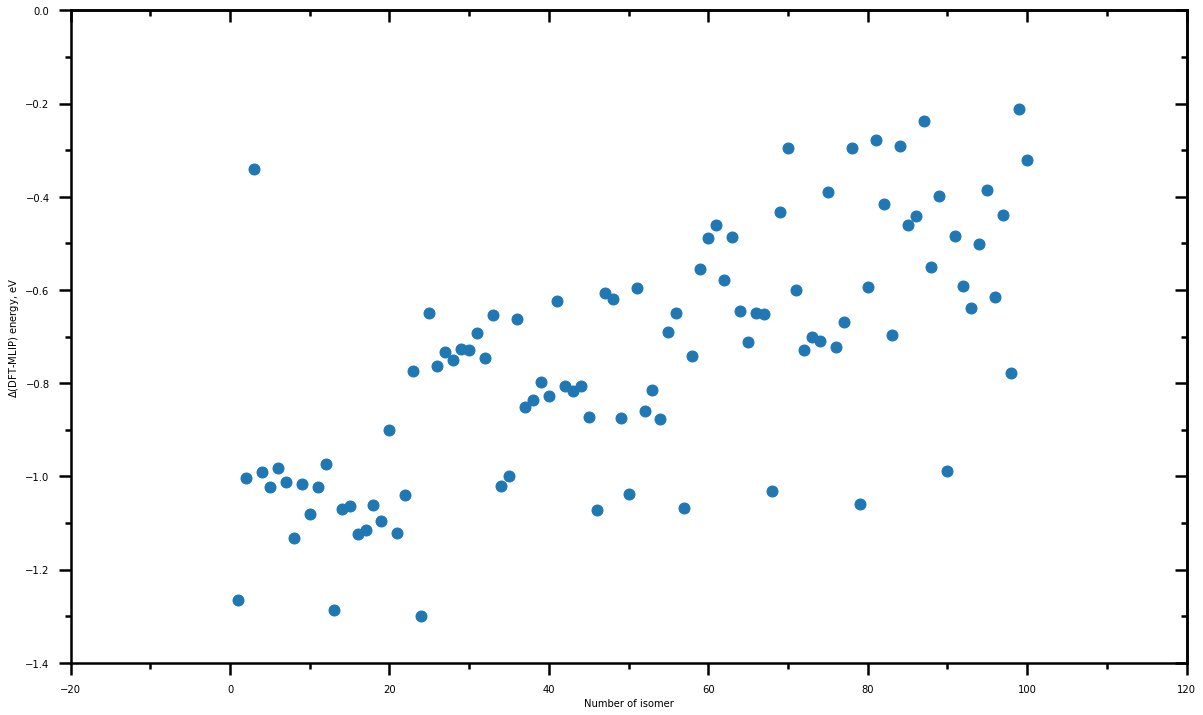

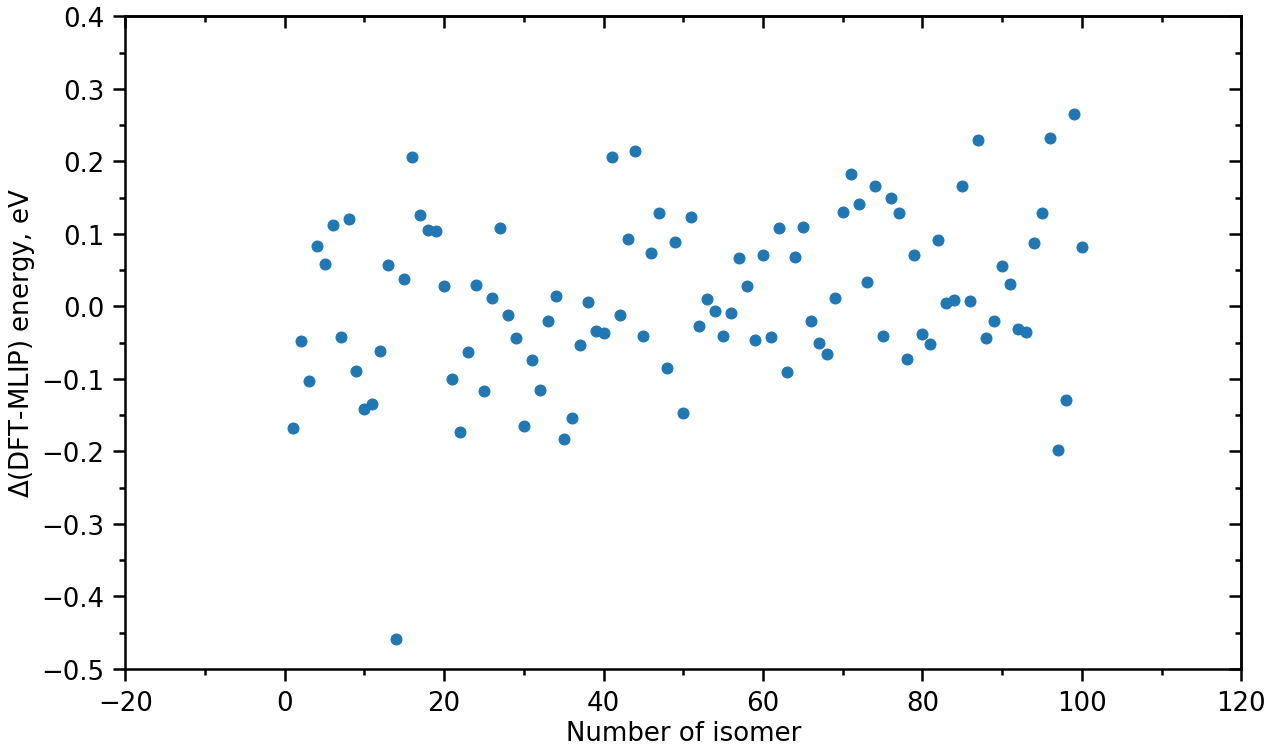

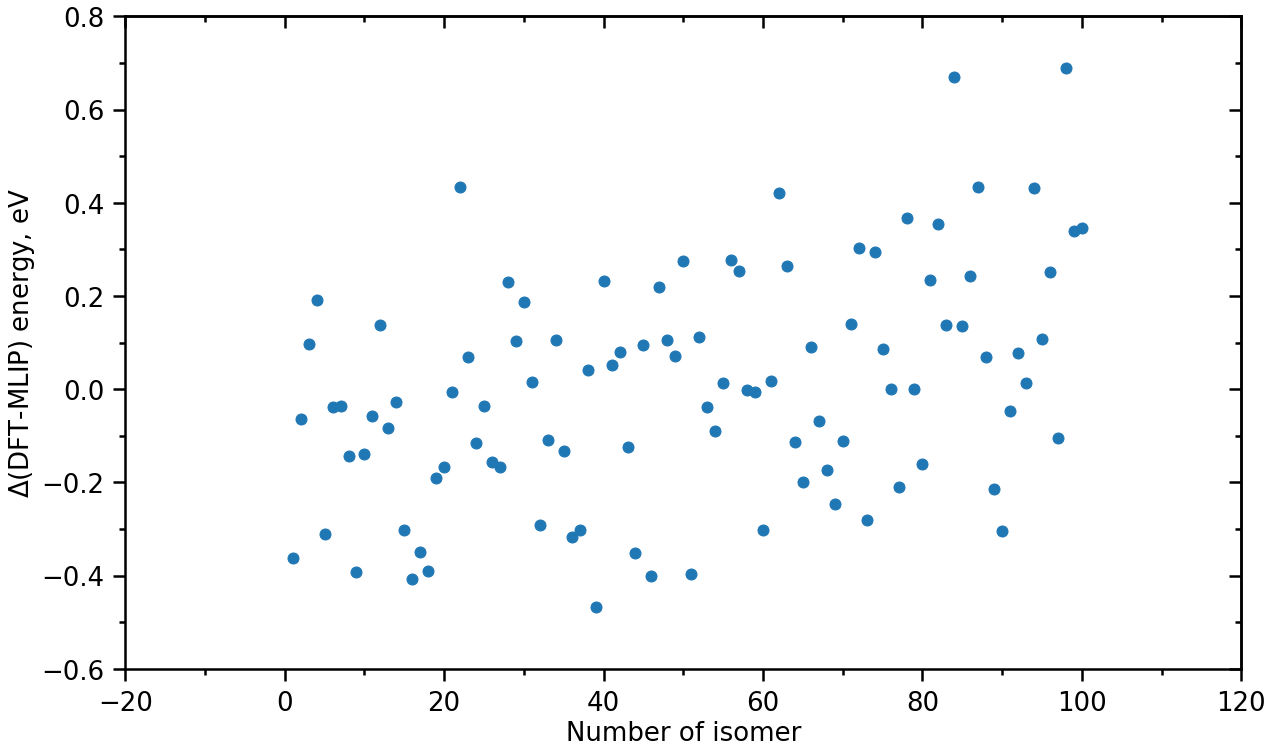

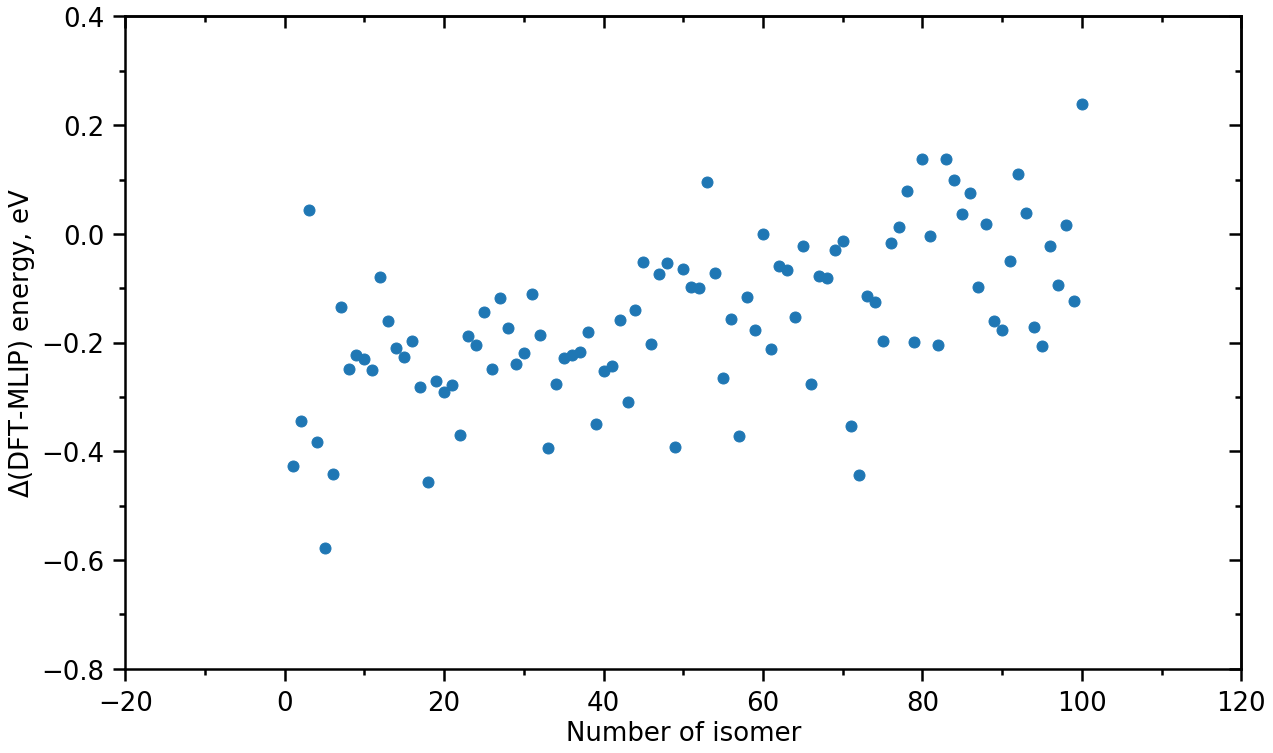

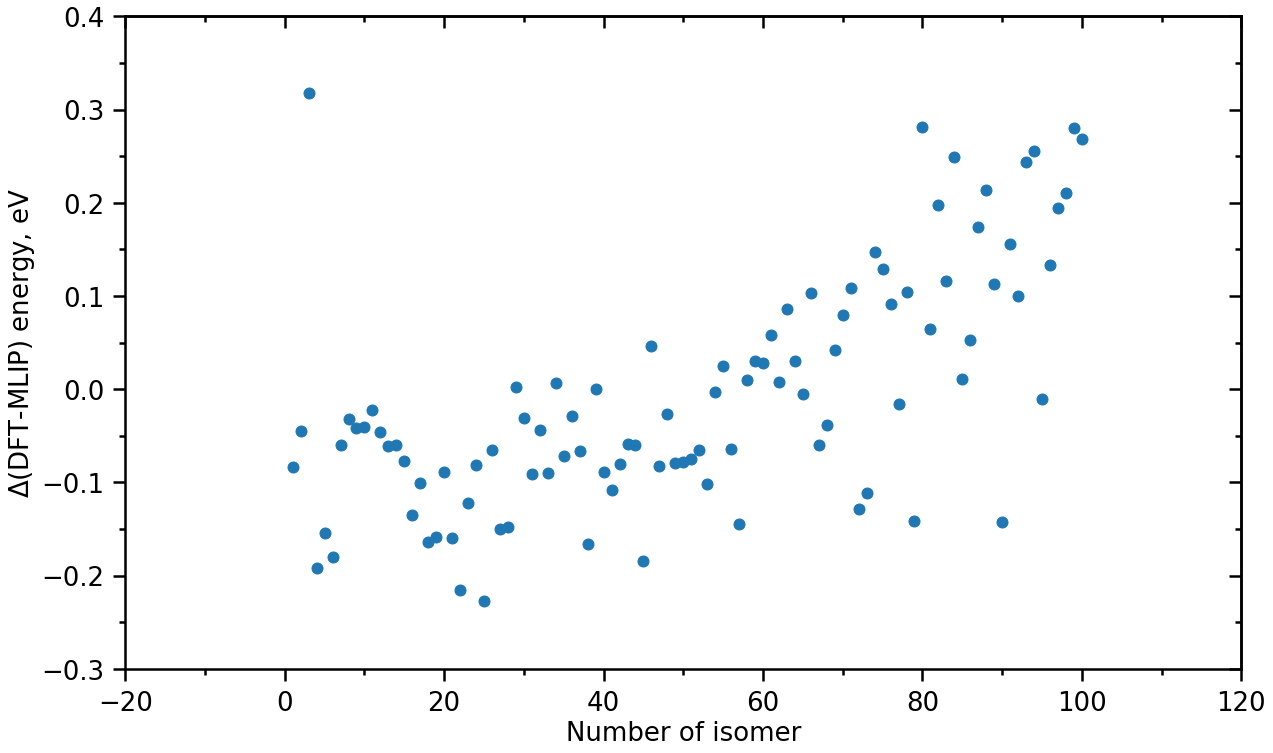

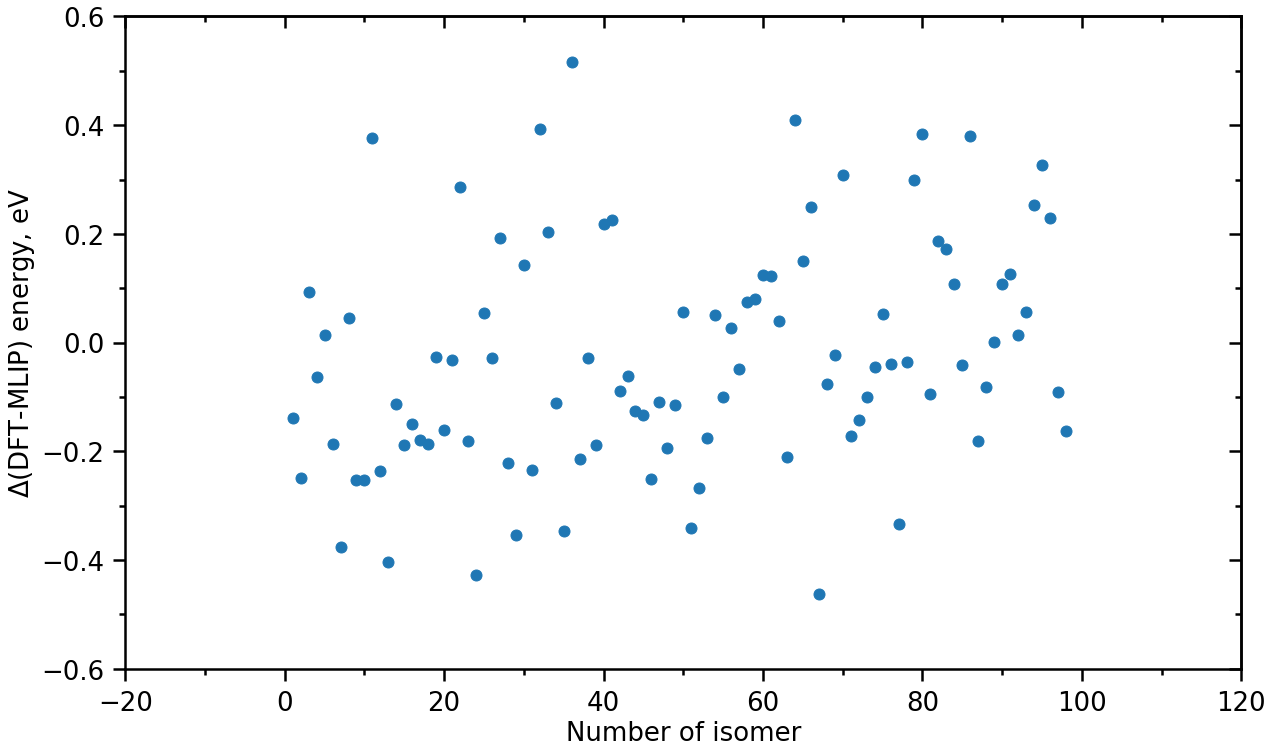

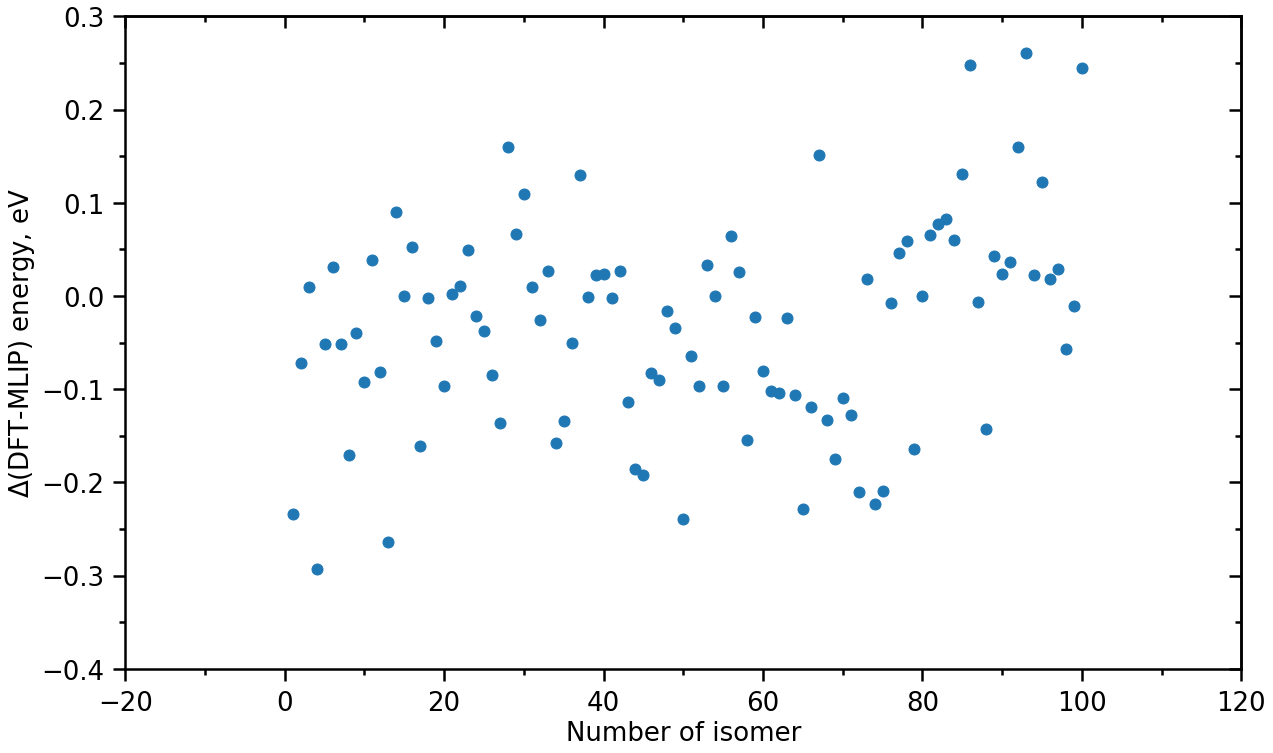

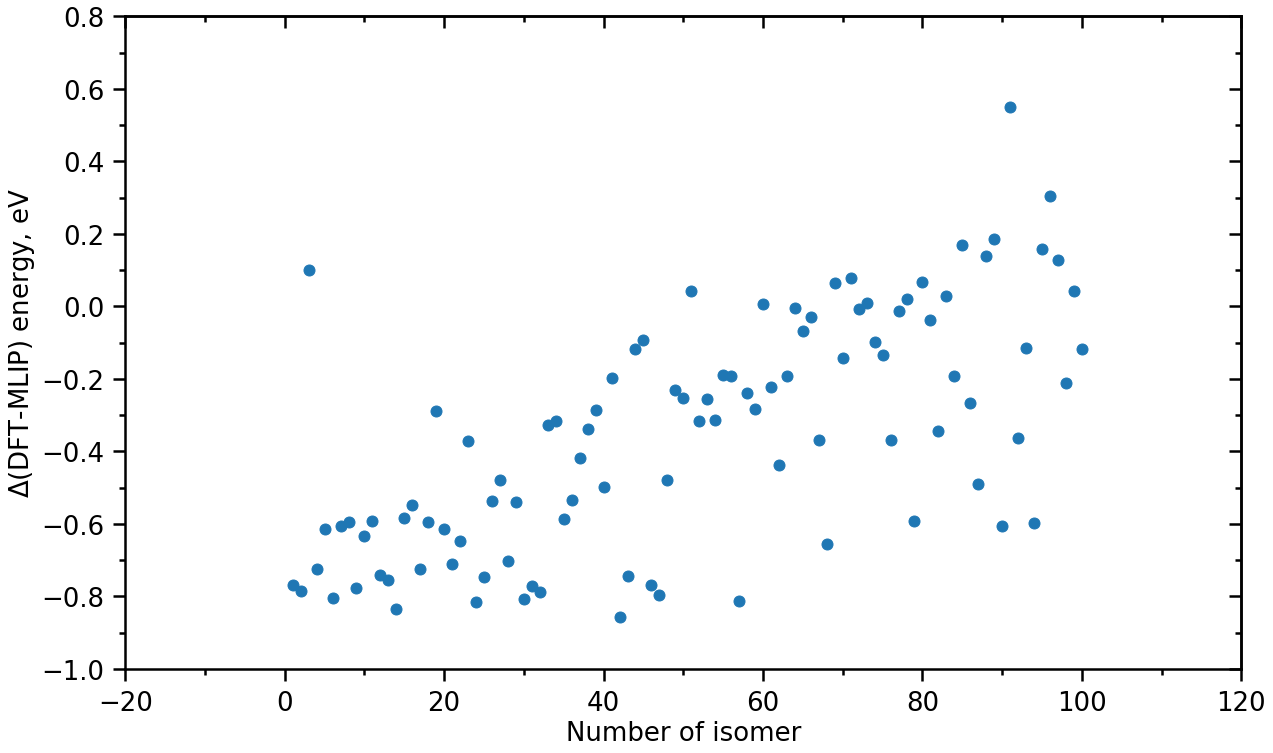

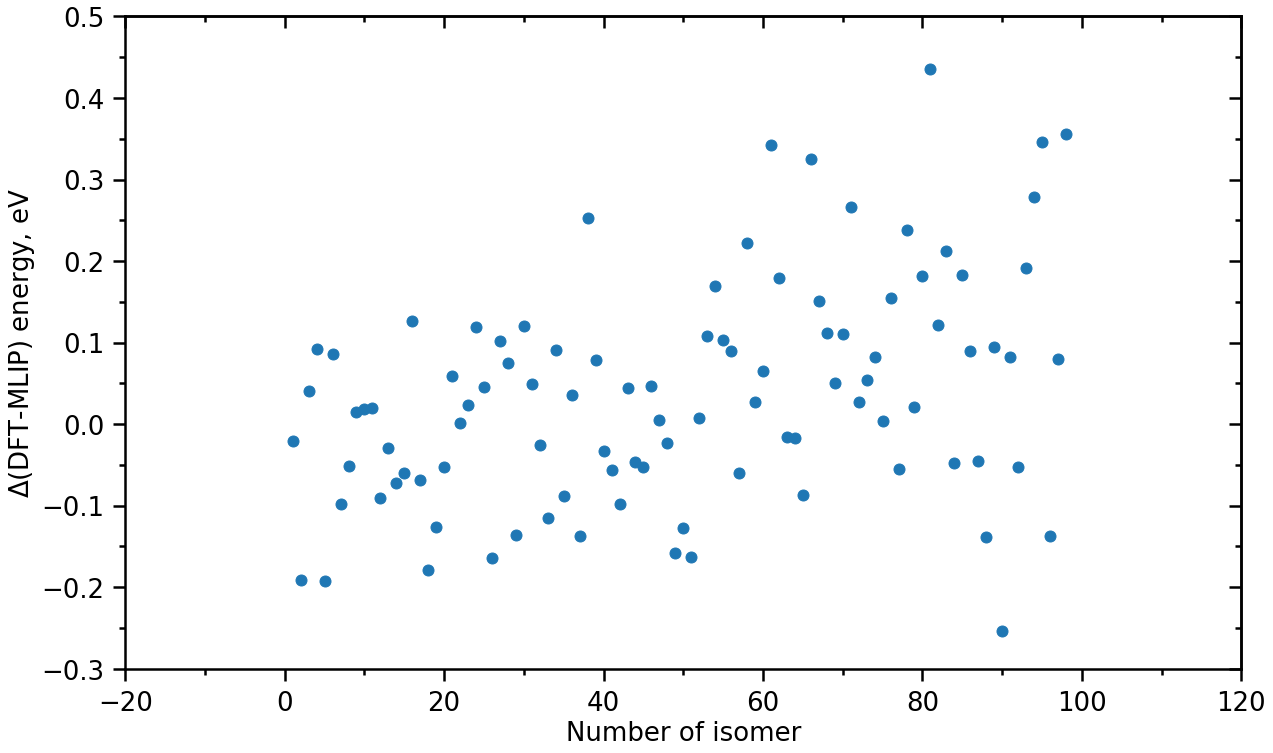

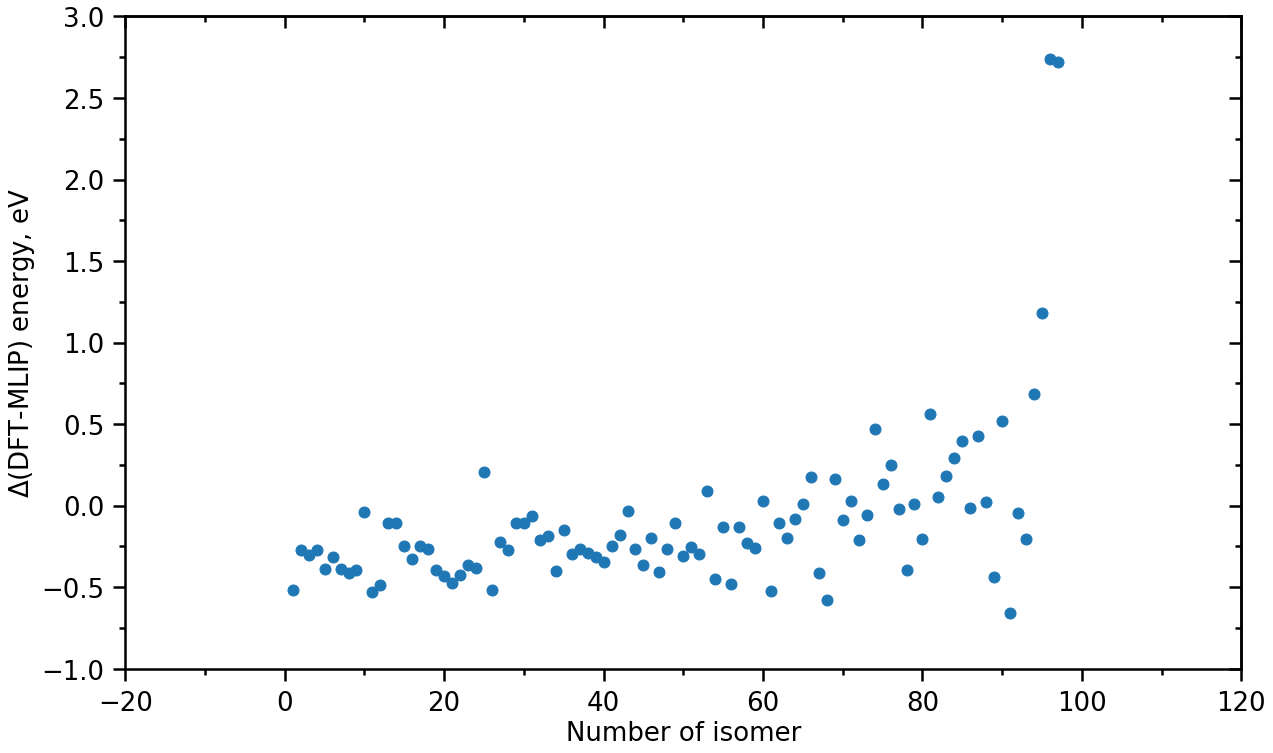

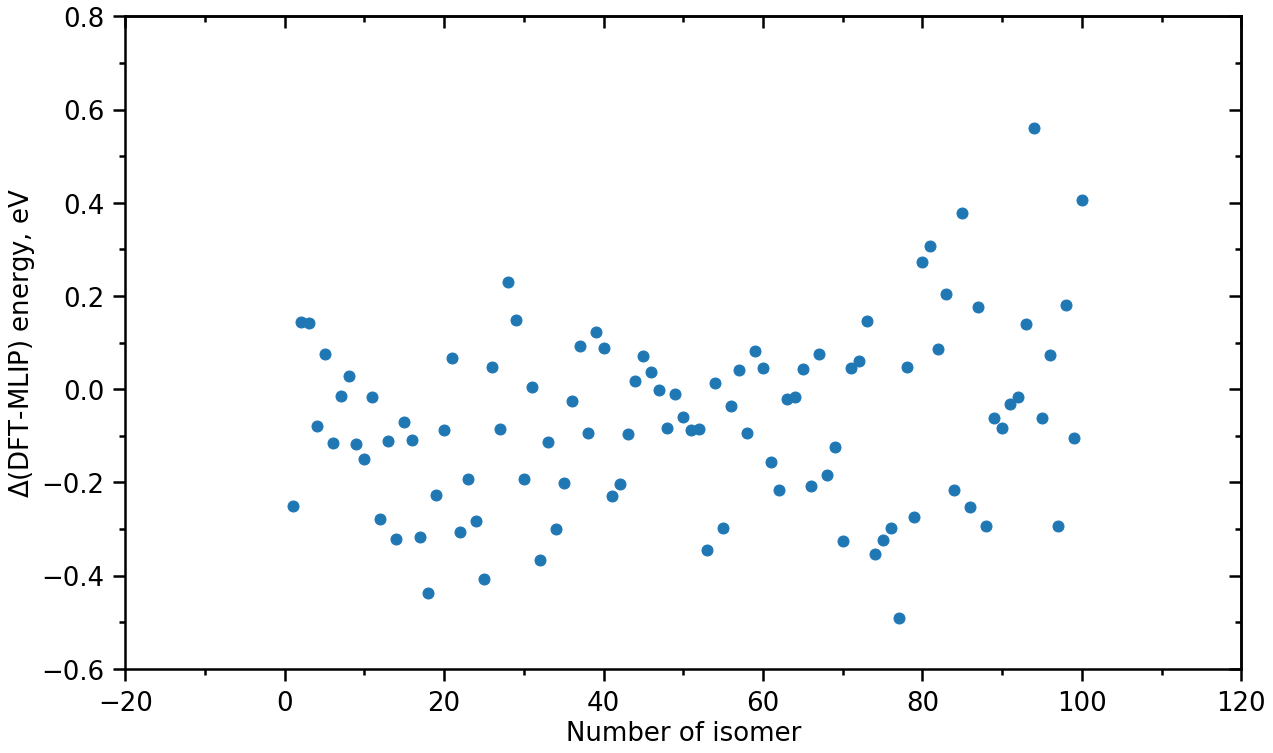

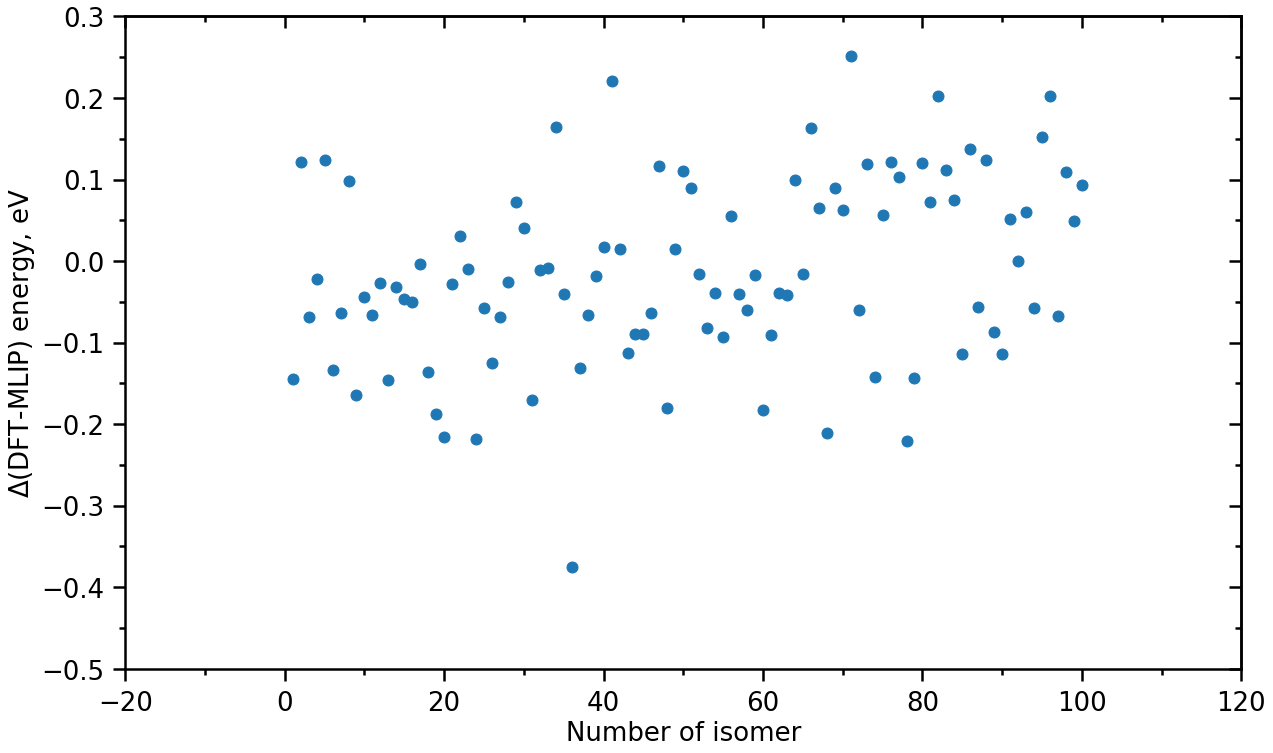

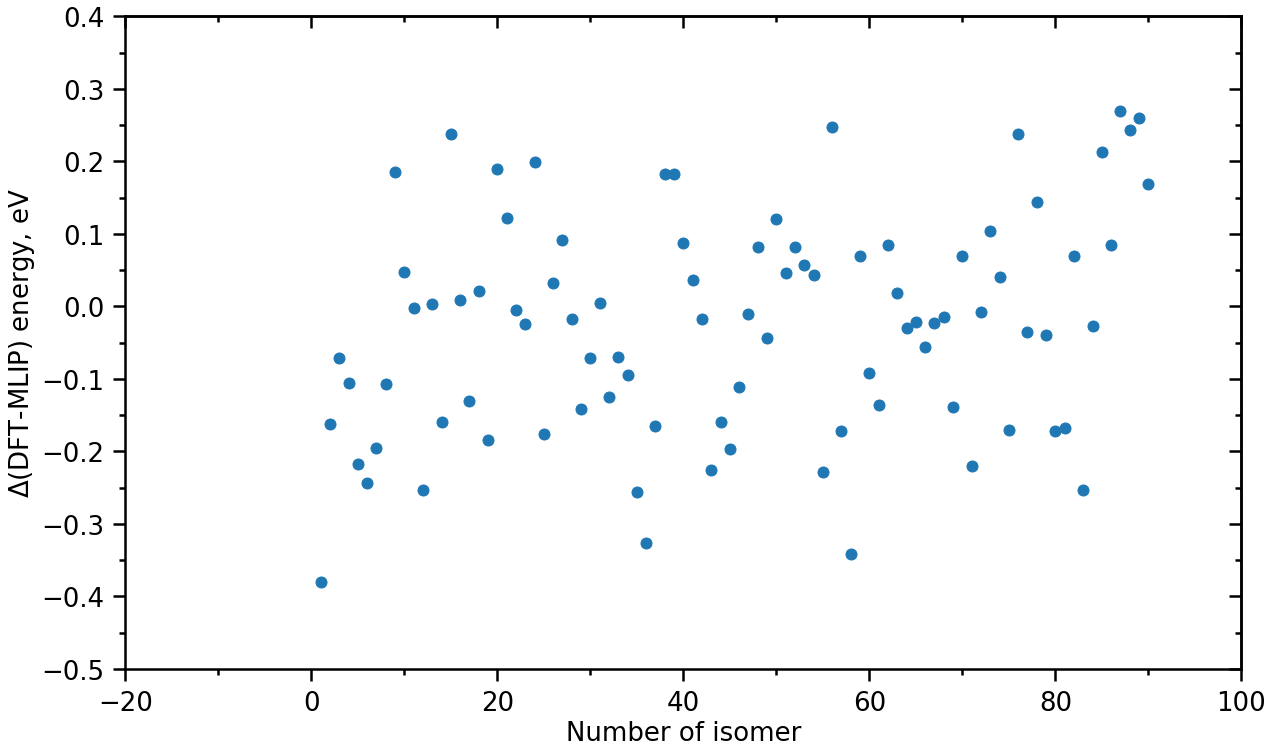

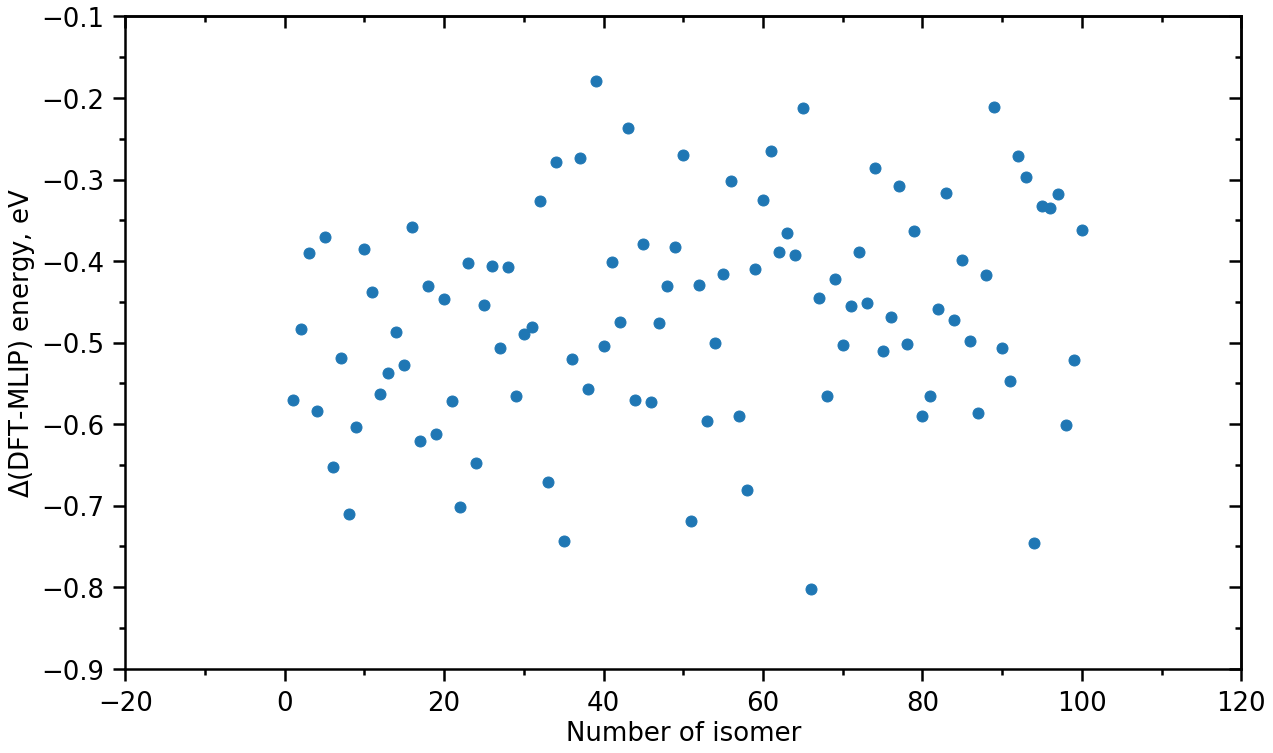

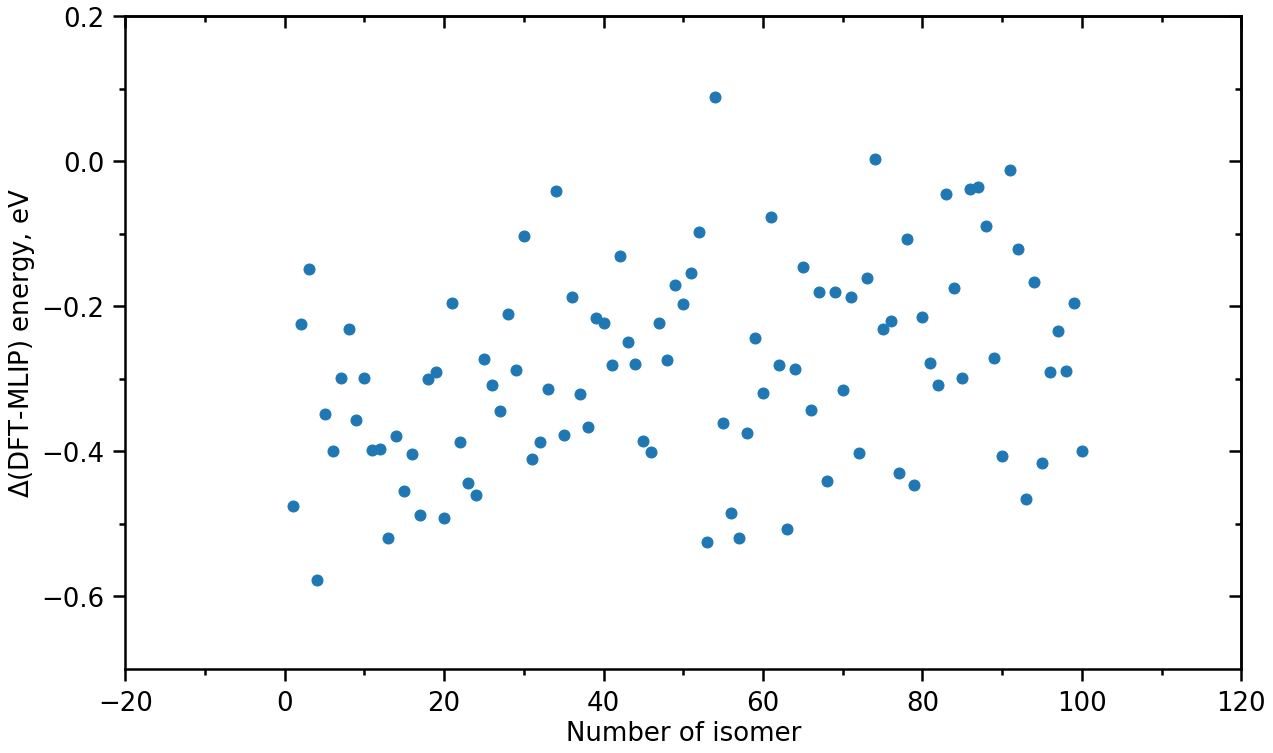

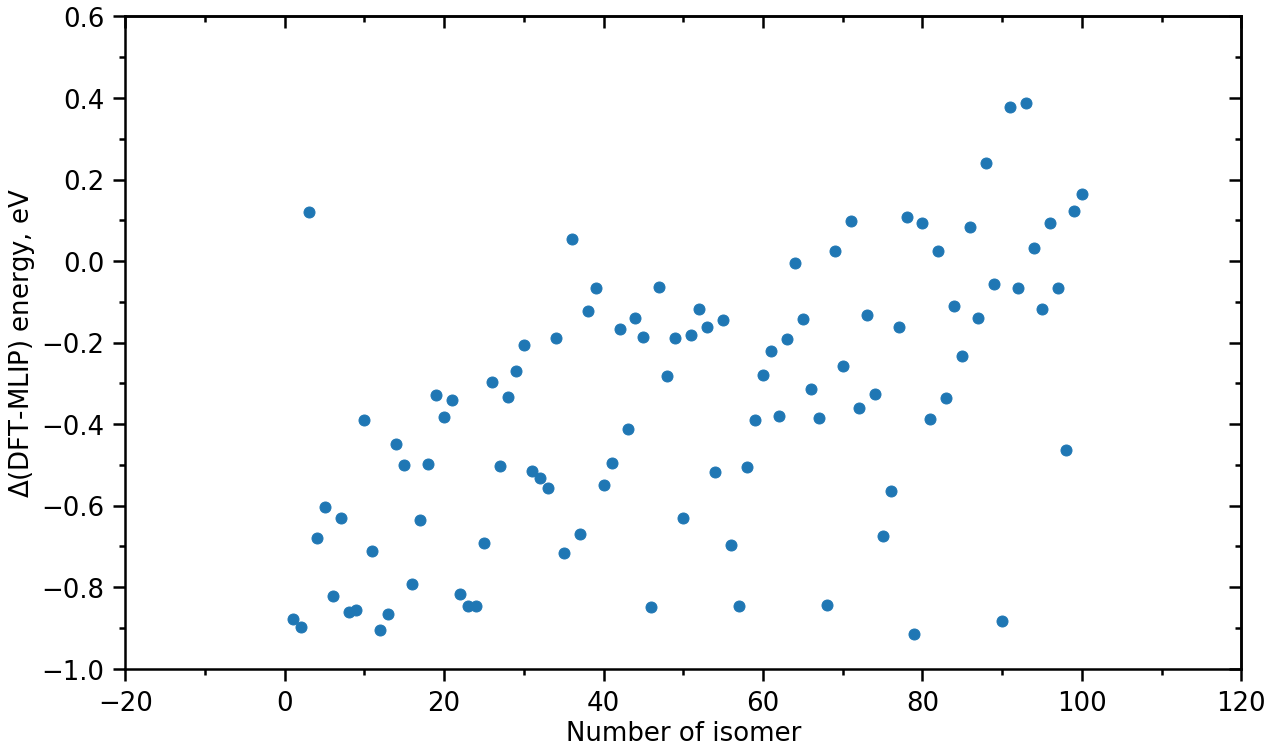

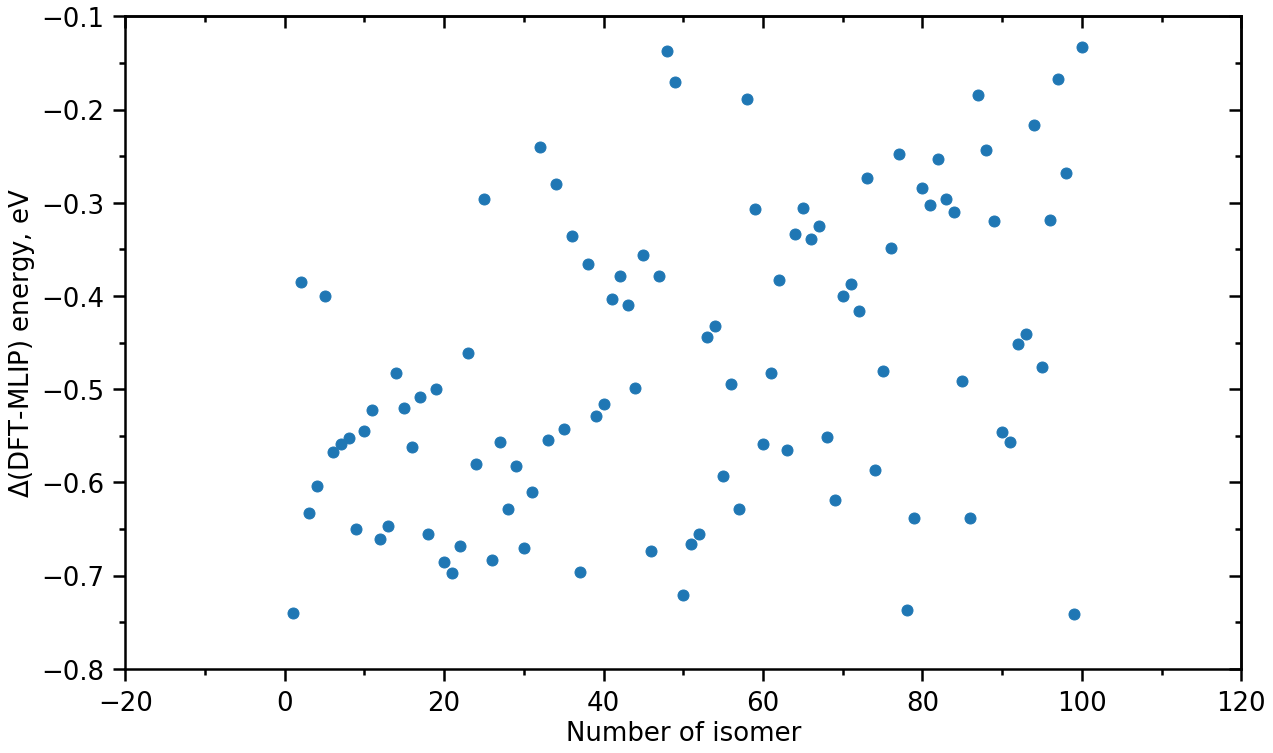

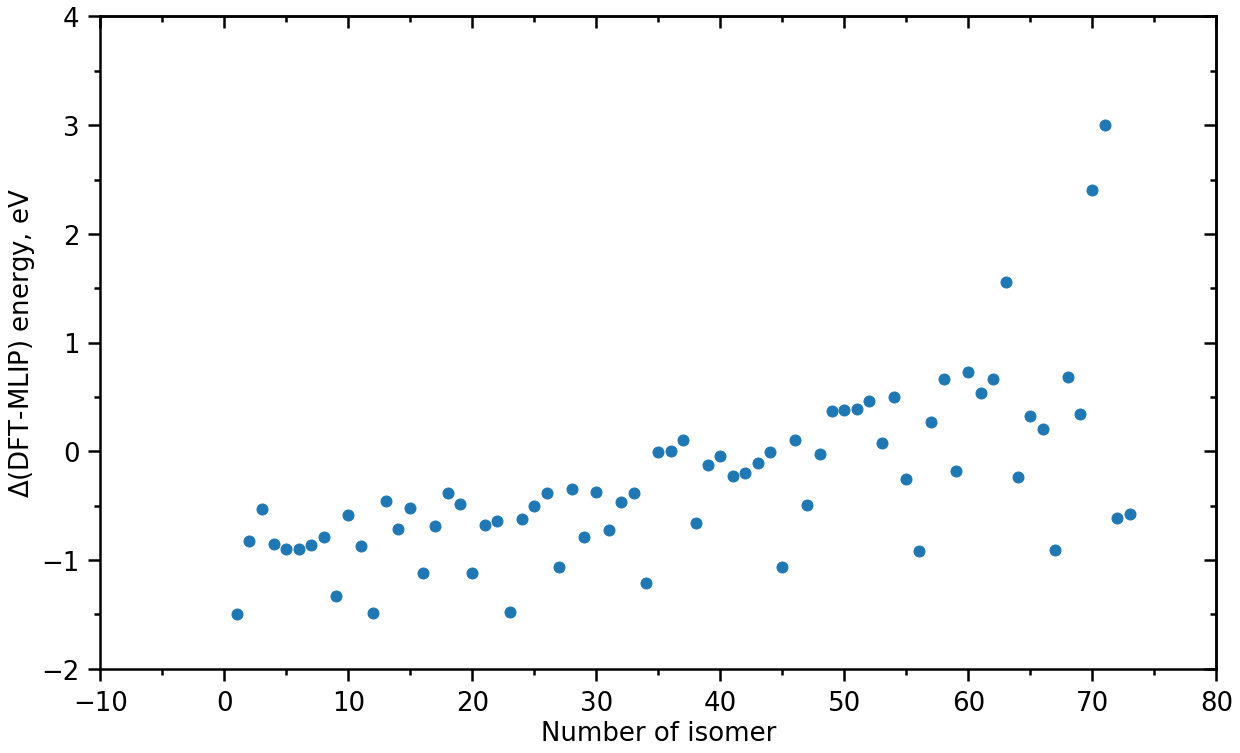

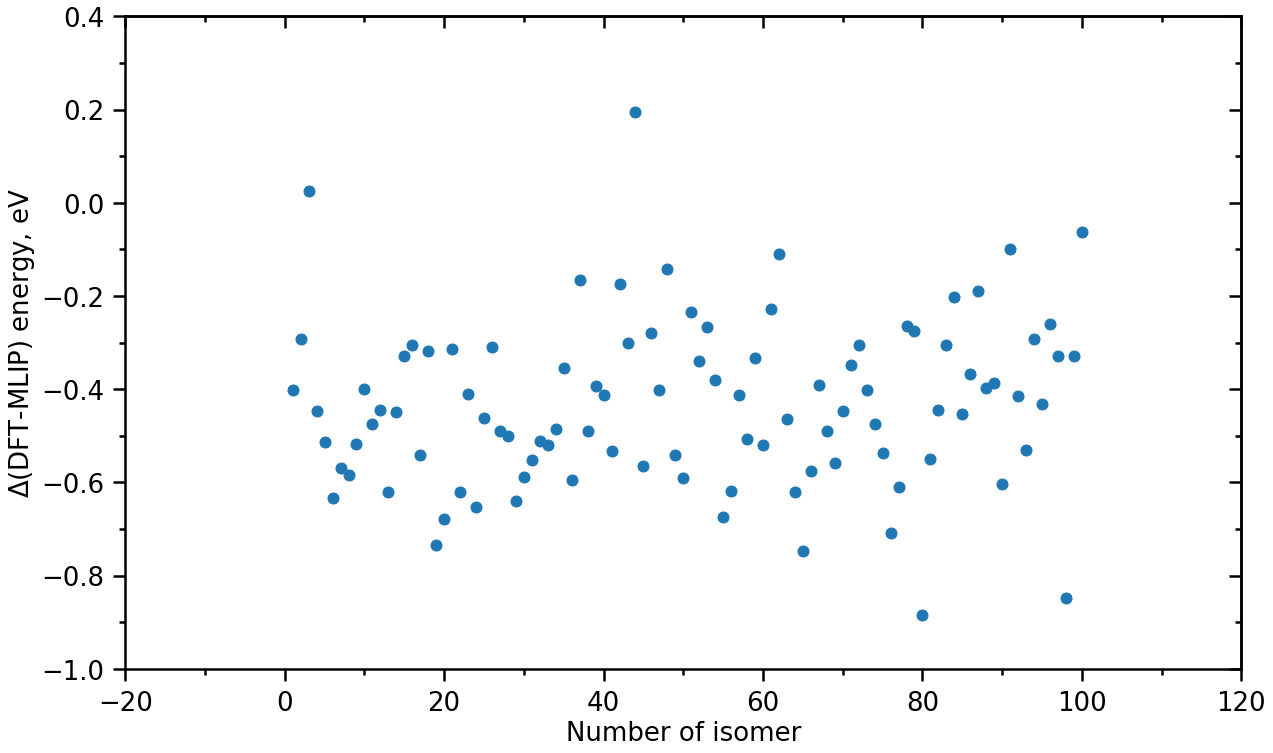

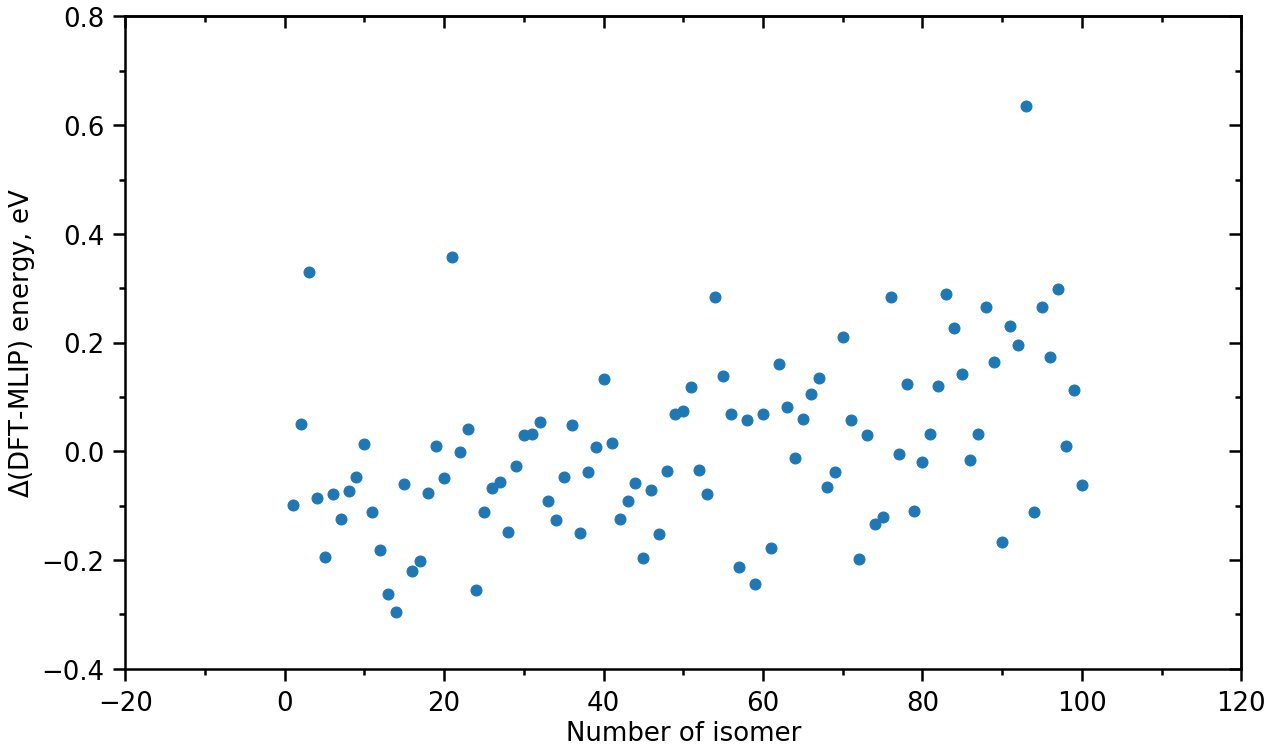

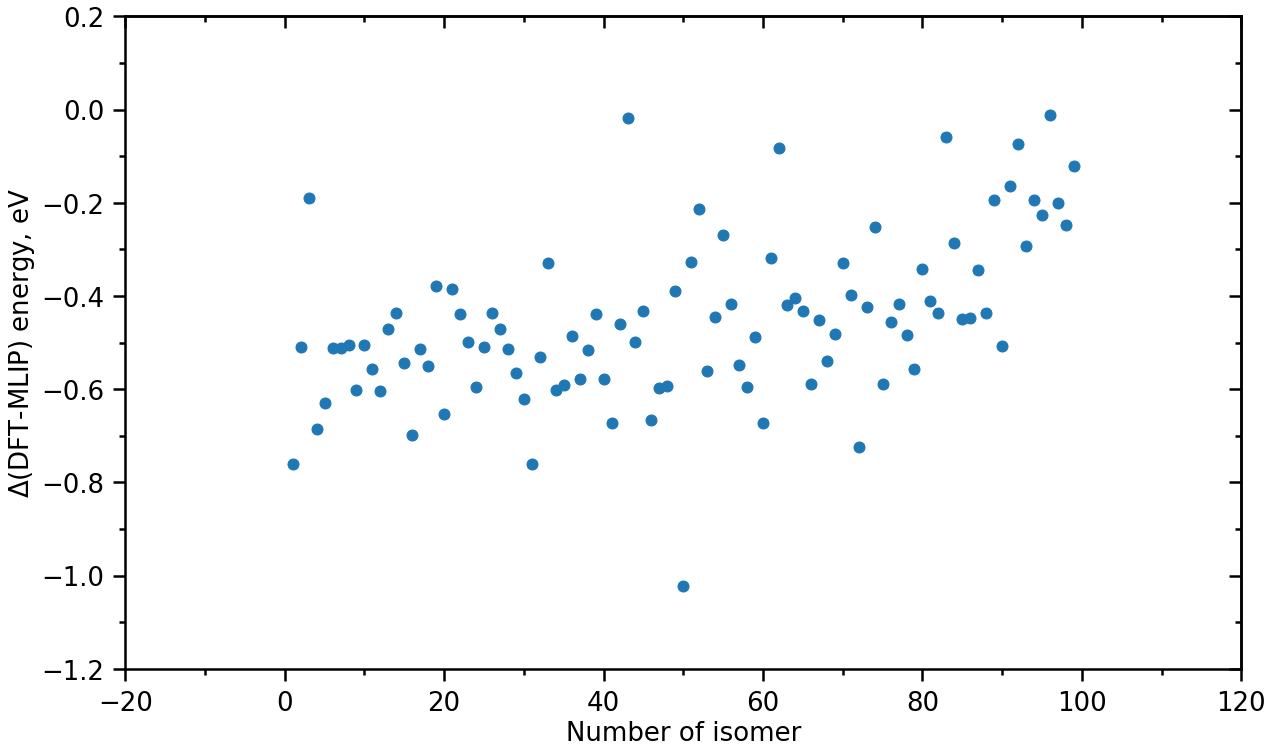

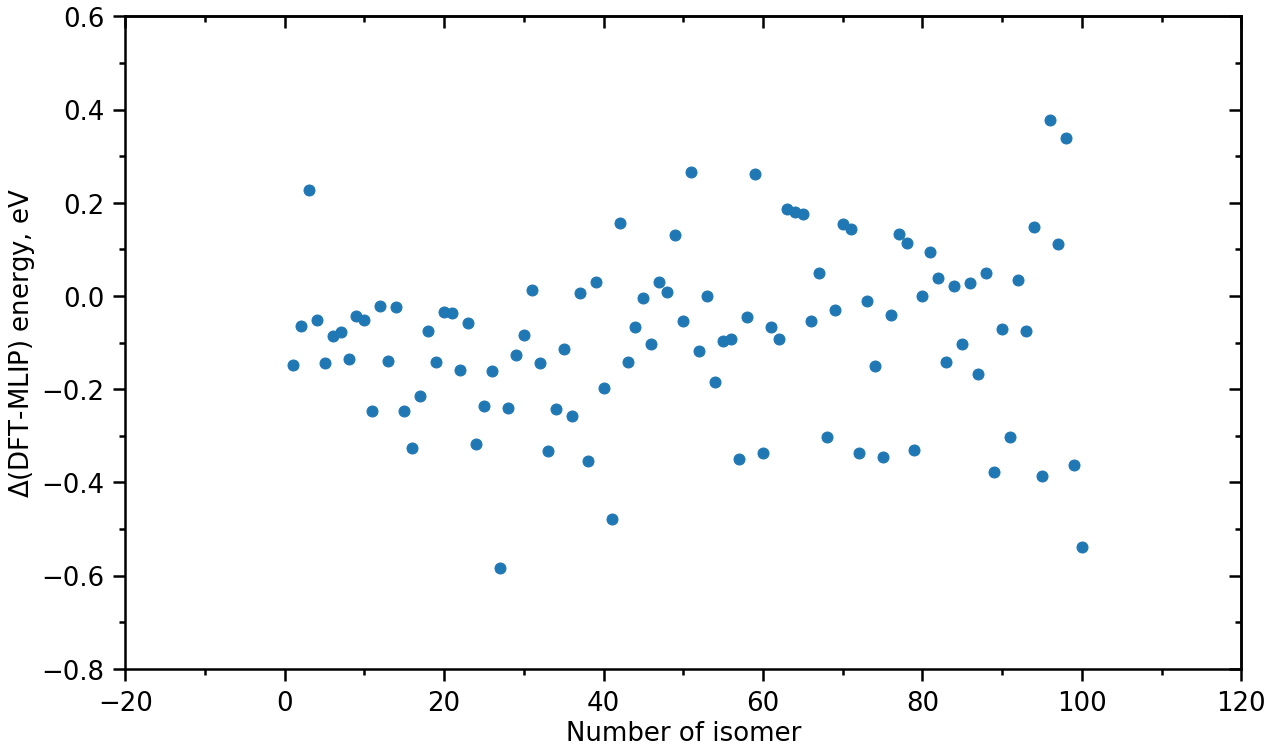

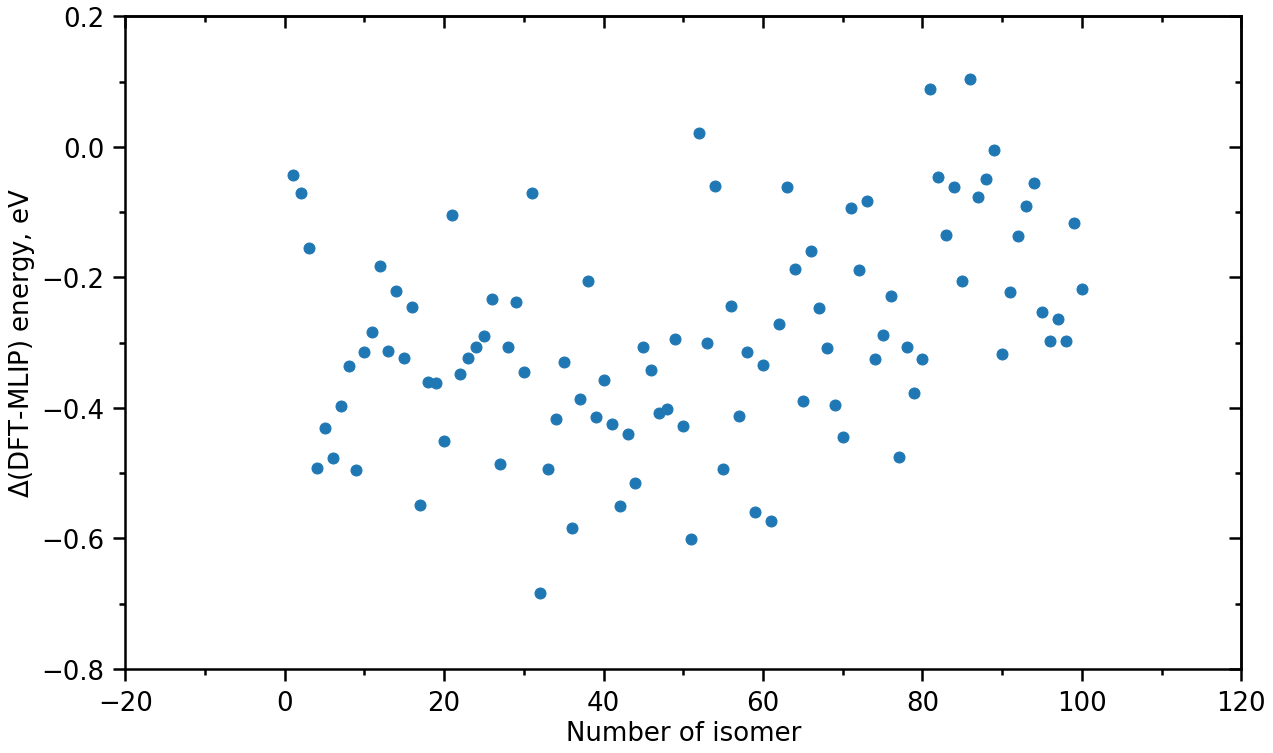

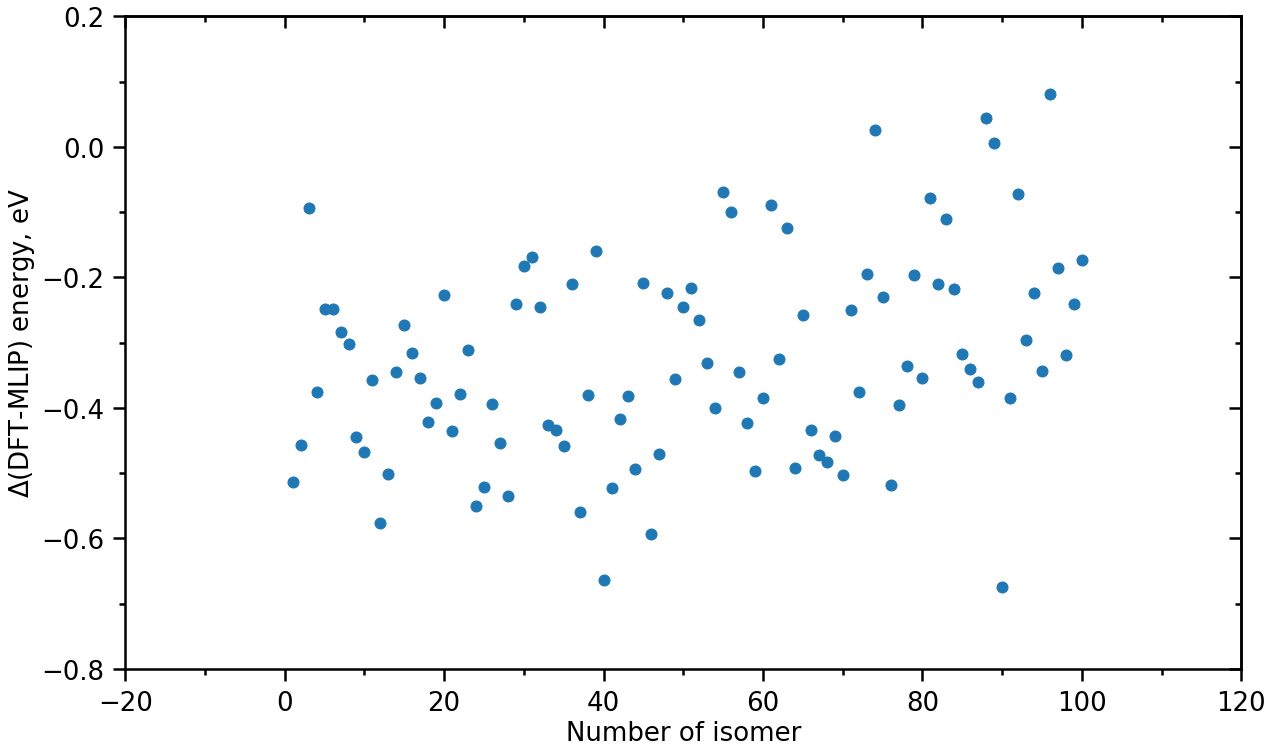

In [80]:
for pltDir in Dirs:
    Samp = Sample(pltDir)
    plot_in_dir(Samp)
